# DigitalTwin & Automation

#### TEAM PROJECT :: KAMP Injection Molding Machine ManufacturingData Diagnosis

                                                     Name:   Park Jeong Woo
                                                             Yoo Jin Soo
                                                             Hong Se Hyun
                                                             
                                                     Date:   2022.05.04. Wed.

Note! This Code is for about image data preprocessing.

***

## 1. Import Libraries

In [1]:
# !pip install opencv-python

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2 as cv
import json

In [2]:
cv.__version__

'4.5.5'

***
***

## 2. Image Preprocessing [For Left Image]


### 2.1 Read Data


- Dataset: left_data.csv (Temperature image data of injection molded products)
- Source: KAMP Machine VIsion Dataset
- Target: Get the intensity values corresponding to a specific area of the temperature image by using openCV Python Library.

In [3]:
# Import & Read Dataset
file_name = 'left_data.csv'

r     = open(file_name, mode = 'r')
lines = r.readlines()

In [4]:
# Verify that the data was read correctly
lines[0]

'17.392,17.349,17.436,17.522,17.544,17.587,17.738,17.825,17.825,17.825,17.911,17.868,17.868,17.868,17.954,18.105,18.083,18.319,18.491,18.641,19.302,20.274,22.665,27.99,39.456,46.835,50.575,52.92,53.409,52.476,50.414,48.711,47.793,47.579,47.957,47.99,47.1,44.324,39.509,27.226,19.408,18.362,18.083,17.889,17.803,17.544,17.717,17.63,17.565,17.501,17.306,17.392,17.565,17.803,17.825,17.868,17.868,17.868,17.868,17.868,17.825,17.825,17.889,17.889,17.932,17.846,17.825,17.846,17.868,17.868,17.825,17.803,17.889,17.889,17.803,17.825,17.846,17.846,17.825,17.825,17.803,17.63,17.609,17.501,17.565,17.674,17.652,17.695,17.587,17.76,17.76,17.803,17.825,17.846,17.825,17.825,17.803,17.781,17.738,17.781,17.738,17.717,17.652,17.76,17.781,17.76,17.803,17.76,17.846,17.652,17.738,17.781,17.674,17.695,17.609,17.717,17.674,17.674,17.63,17.652,17.652,17.738,17.781,17.825,17.825,17.76,17.781,17.803,17.846,17.868,17.803,17.803,17.803,17.803,17.781,17.76,17.781,17.803,17.803,17.781,17.76,17.738,17.695,17.717,17.738,

***

### 2.2 Reshape Image Dataset

##### Create Data vector :: 414X81920

    Since one image consists of (256*320)pixels a total of 81920 data exist in one row.
    A total of 414 images exist in 'Left_Data.csv', so the shape of the Data Vector is 414*(256*320).


In [5]:
# Create Data vector :: 414X81920
vectors   = np.zeros((414,81920))

for data in range(0,414):
    numbers = lines[data].split(',')
    flir_vector = []
    
    for i in range(0,81920):
        flir_vector.append(float(numbers[i]))
        
    vectors[data,:] = np.transpose(flir_vector)

***

### 2.3 Compare Normal and Abnormal Images

##### Criteria for Normal/Abnormal products

    Normal products : 0.8mm < Section thickness < 1.5mm
    Abnormal products : Section thickness <= 0.8mm   OR   Section thickness >= 1.5mm
    
Information on normal data and abnormal data can be obtained through 'left_label.csv'.

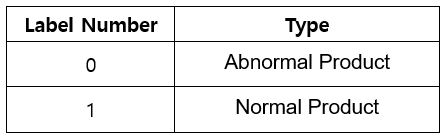

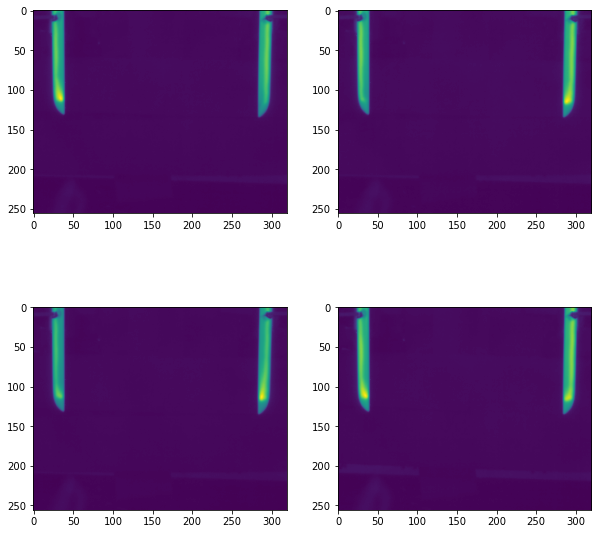

In [6]:
# Ensure that one image data is properly contained in one row.

# Note! the image consists of 256*320 Pixel.
# Note! the loaded data is a Dataset about Left Product, so you have to focus on the left image.

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(np.reshape(vectors[11,:],[256,320]))     # Normal Product
plt.subplot(2,2,2)
plt.imshow(np.reshape(vectors[12,:],[256,320]))     # Abnormal Product
plt.subplot(2,2,3)
plt.imshow(np.reshape(vectors[13,:],[256,320]))     # Normal Product
plt.subplot(2,2,4)
plt.imshow(np.reshape(vectors[14,:],[256,320]))     # Normal Product
plt.show()

***

### 2.4 Get Values for a Specific Region

##### Using contour and THRESH_BINARY

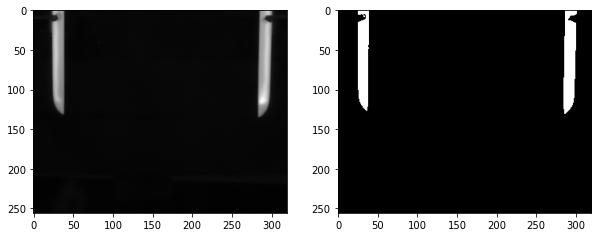

In [7]:
flir_image = np.zeros((414, 256, 320)); # A frame it can store the 'vector' made above to other shape(414*256*320).
cont_image = np.zeros((414, 256, 320)); # A frame it can store the 'Binary Image Data' that 'contour and THRESH_BINARY' was applied.

for  i in range(0,414):
    flir_image[i]       =  np.reshape(vectors[i,:],[256,320])
    ret, mask           =  cv.threshold(flir_image[i], 41, 255, cv.THRESH_BINARY)
                        # If the Intensity value is greater than 41, make it 255. Otherwise, make it 0.
    mask                =  cv.convertScaleAbs(mask)
    contours, hierarchy =  cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    
    for contour in contours :
        img_cont  = cv.drawContours(cont_image[i], [contour], -1, 255, thickness = -1)
    cont_image[i] = img_cont

# View Results with Images
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(flir_image[12], 'gray') # Raw Image of 414th Data
plt.subplot(1,2,2)
plt.imshow(cont_image[12], 'gray') # Image of the 414th data where preprocessing took place

In [8]:
# Verifying that the preprocessing was performed successfully
# Gets all the values in the 10th row (out of 256X320) of the first image.
cont_image[12][10]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0., 255., 255., 255., 255.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

***

### 2.5 Image Masking

63.5

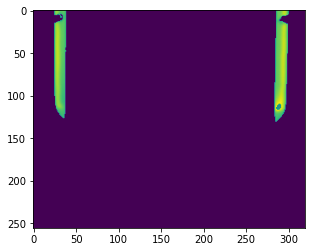

In [9]:
# Use 'and' operations to extract and store the intensity of raw image data corresponding to coutour data.
Mask_image = cv.bitwise_and(flir_image, cont_image)

plt.imshow(Mask_image[12])    # Masked Image (Only the contour area from the original image survives, and the rest were deleted.)

# Observe the maximum value. To verify that the 'masking process' was performed successfully.
Mask_image[12].max()

***

### 2.6 Photo Segmentation

The process of dividing masked images to left images and right images.

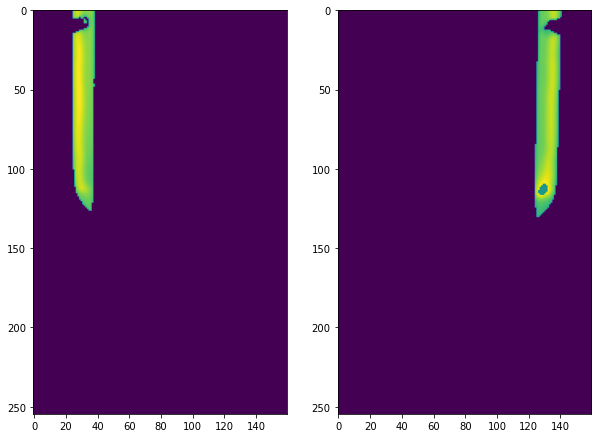

In [10]:
flir_left = np.zeros((414, 255, 160));
flir_right = np.zeros((414, 255, 160));

for i in range(0,414):
    flir_left[i]  = Mask_image[i][0:255, 0:160]
    flir_right[i] = Mask_image[i][0:255,160:320]

plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(flir_left[12])
plt.subplot(1,2,2)
plt.imshow(flir_right[12])

***

### 2.7 Data Storing

Operations to access only pixels where injection molded products exist

    data  = Frames for storing pixel values of the location where the injection molded product is present.
    count =  Store the number of pixels taken from each image.

In [11]:
data = np.zeros((414, 2000))
count = 0

for num in range(0, 414) :
    for images in flir_left[num] :
        for i in images :
            if i > 1 :
                data[num][count] = i
                count = count + 1
                
    count = 0

In [12]:
df_L = pd.DataFrame(data)
df_L

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,46.75,50.50,52.75,53.25,52.25,50.25,48.50,47.75,47.50,47.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,46.00,50.00,52.50,53.25,52.50,50.75,49.25,48.25,48.00,48.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,46.25,50.00,52.50,53.25,52.25,50.50,49.00,48.00,47.75,47.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47.25,51.00,53.25,53.50,52.50,50.50,49.00,48.25,48.00,48.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,46.25,50.25,52.75,53.50,52.50,50.75,49.00,48.00,47.75,48.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,41.75,47.25,50.25,51.50,52.00,51.25,50.25,49.25,48.75,48.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
410,41.75,47.50,50.25,51.75,52.00,51.25,50.00,49.00,48.50,48.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
411,41.50,47.25,50.00,51.75,52.00,51.50,50.25,49.25,48.50,48.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
412,41.75,47.25,50.00,51.50,52.00,51.25,50.00,49.00,48.50,48.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


***
***

## 3. Image Preprocessing [For Right Image]

### 3.1 Read Data


- Dataset: right_data.csv (Temperature image data of injection molded products)
- Source: KAMP Machine VIsion Dataset
- Target: Get the intensity values corresponding to a specific area of the temperature image by using openCV Python Library.

In [13]:
# Import & Read Dataset
file_name = 'right_data.csv'

r     = open(file_name, mode = 'r')
lines = r.readlines()

In [14]:
# Verify that the data was read correctly
lines[0]

'17.392,17.349,17.436,17.522,17.544,17.587,17.738,17.825,17.825,17.825,17.911,17.868,17.868,17.868,17.954,18.105,18.083,18.319,18.491,18.641,19.302,20.274,22.665,27.99,39.456,46.835,50.575,52.92,53.409,52.476,50.414,48.711,47.793,47.579,47.957,47.99,47.1,44.324,39.509,27.226,19.408,18.362,18.083,17.889,17.803,17.544,17.717,17.63,17.565,17.501,17.306,17.392,17.565,17.803,17.825,17.868,17.868,17.868,17.868,17.868,17.825,17.825,17.889,17.889,17.932,17.846,17.825,17.846,17.868,17.868,17.825,17.803,17.889,17.889,17.803,17.825,17.846,17.846,17.825,17.825,17.803,17.63,17.609,17.501,17.565,17.674,17.652,17.695,17.587,17.76,17.76,17.803,17.825,17.846,17.825,17.825,17.803,17.781,17.738,17.781,17.738,17.717,17.652,17.76,17.781,17.76,17.803,17.76,17.846,17.652,17.738,17.781,17.674,17.695,17.609,17.717,17.674,17.674,17.63,17.652,17.652,17.738,17.781,17.825,17.825,17.76,17.781,17.803,17.846,17.868,17.803,17.803,17.803,17.803,17.781,17.76,17.781,17.803,17.803,17.781,17.76,17.738,17.695,17.717,17.738,

***

### 3.2 Reshape Image Dataset

##### Create Data vector :: 423X81920

    Since one image consists of (256*320)pixels a total of 81920 data exist in one row.
    A total of 423 images exist in 'Right_Data.csv', so the shape of the Data Vector is 423*(256*320).

In [15]:
# Create Data vector :: 423X81920
vectors   = np.zeros((423,81920))

for data in range(0,423):
    numbers = lines[data].split(',')
    flir_vector = []
    
    for i in range(0,81920):
        flir_vector.append(float(numbers[i]))
        
    vectors[data,:] = np.transpose(flir_vector)

***

### 3.3 Compare Normal and Abnormal Images

##### Criteria for Normal/Abnormal products

    Normal products : 0.8mm < Section thickness < 1.5mm
    Abnormal products : Section thickness <= 0.8mm   OR   Section thickness >= 1.5mm
    
Information on normal data and abnormal data can be obtained through 'Right_label.csv'.

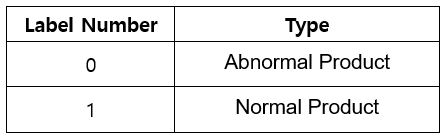

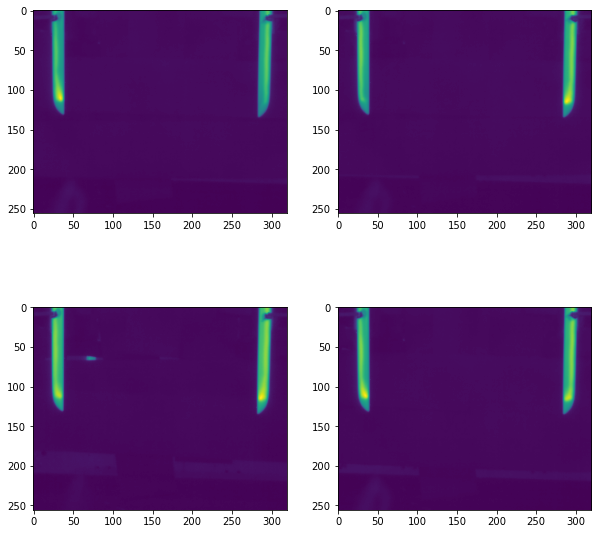

In [16]:
# Ensure that one image data is properly contained in one row.

# Note! the image consists of 256*320 Pixel.
# Note! the loaded data is a Dataset about Right Product, so you have to focus on the Right image.

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(np.reshape(vectors[1,:],[256,320]))     # Normal Product
plt.subplot(2,2,2)
plt.imshow(np.reshape(vectors[12,:],[256,320]))     # Normal Product
plt.subplot(2,2,3)
plt.imshow(np.reshape(vectors[170,:],[256,320]))     # Abnormal Product
plt.subplot(2,2,4)
plt.imshow(np.reshape(vectors[14,:],[256,320]))     # Normal Product
plt.show()

***

### 3.4 Get Values for a Specific Region

##### Using contour and THRESH_BINARY

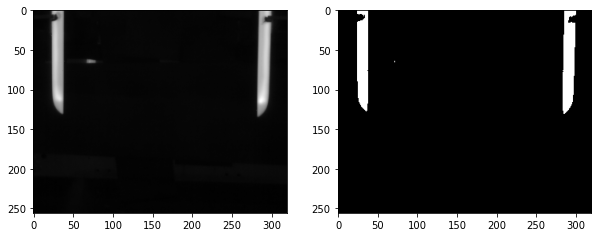

In [17]:
flir_image = np.zeros((423, 256, 320)); # A frame it can store the 'vector' made above to other shape(423*256*320).
cont_image = np.zeros((423, 256, 320)); # A frame it can store the 'Binary Image Data' that 'contour and THRESH_BINARY' was applied.

for  i in range(0,423):
    flir_image[i]       =  np.reshape(vectors[i,:],[256,320])
    ret, mask           =  cv.threshold(flir_image[i], 41, 255, cv.THRESH_BINARY)
                        # If the Intensity value is greater than 41, make it 255. Otherwise, make it 0.
    mask                =  cv.convertScaleAbs(mask)
    contours, hierarchy =  cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    
    for contour in contours :
        img_cont  = cv.drawContours(cont_image[i], [contour], -1, 255, thickness = -1)
    cont_image[i] = img_cont

# View Results with Images
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(flir_image[170], 'gray') # Raw Image of 423th Data
plt.subplot(1,2,2)
plt.imshow(cont_image[170], 'gray') # Image of the 423th data where preprocessing took place

In [18]:
# Verifying that the preprocessing was performed successfully
# Gets all the values in the 10th row (out of 256X320) of the first image.
cont_image[170][50]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

***

### 3.5 Image Masking

61.0

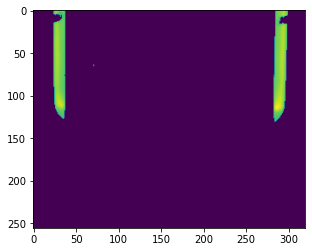

In [19]:
# Use 'and' operations to extract and store the intensity of raw image data corresponding to coutour data.
Mask_image = cv.bitwise_and(flir_image, cont_image)

plt.imshow(Mask_image[170])    # Masked Image (Only the contour area from the original image survives, and the rest were deleted.)

# Observe the maximum value. To verify that the 'masking process' was performed successfully.
Mask_image[170].max()

***

### 3.6 Photo Segmentation

The process of dividing masked images to left images and right images.

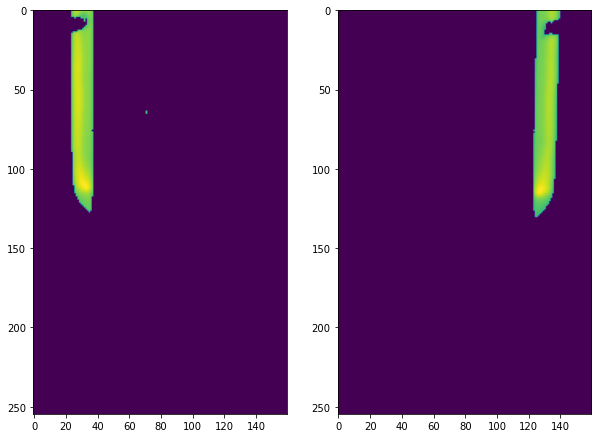

In [20]:
flir_left = np.zeros((423, 255, 160));
flir_right = np.zeros((423, 255, 160));

for i in range(0,423):
    flir_left[i]  = Mask_image[i][0:255, 0:160]
    flir_right[i] = Mask_image[i][0:255,160:320]

plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(flir_left[170])
plt.subplot(1,2,2)
plt.imshow(flir_right[170])

In [21]:
flir_right[170][50]

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 44.  , 47.  ,
       48.  , 48.75,

***

### 3.7 Data Storing

Operations to access only pixels where injection molded products exist

    data  = Frames for storing pixel values of the location where the injection molded product is present.
    count =  Store the number of pixels taken from each image.

In [22]:
data = np.zeros((423, 2000))
count = 0

for num in range(0, 423) :
    for images in flir_right[num] :
        for i in images :
            if i > 1 :
                data[num][count] = i
                count = count + 1
                
    count = 0

In [23]:
df_R = pd.DataFrame(data)
df_R

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,43.50,46.75,48.75,49.00,49.50,50.25,52.00,54.00,56.25,57.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,43.50,47.00,49.00,49.50,49.75,50.75,52.50,54.75,57.00,58.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,44.25,47.50,49.00,49.50,49.75,50.75,52.25,54.50,56.50,57.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,42.50,46.50,48.25,49.00,49.25,50.25,51.75,53.75,56.25,57.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,42.75,47.00,48.75,49.50,49.75,50.50,52.25,54.25,56.50,57.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,43.25,47.00,48.50,49.25,49.50,50.25,51.00,52.50,53.75,54.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
419,43.25,46.75,48.50,49.00,49.25,50.00,50.75,52.25,53.50,54.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420,43.50,47.00,48.75,49.50,49.75,50.25,51.25,52.50,54.00,54.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421,43.00,46.75,48.50,49.00,49.25,49.75,50.50,51.75,53.25,54.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


***
***

## 4. Store Pre-processed Image Data

In [24]:
df_L.to_csv("PreProcessed_Image_L_Data.csv",mode='a',index=False, header=False)

In [25]:
df_R.to_csv("PreProcessed_Image_R_Data.csv",mode='a',index=False, header=False)